In [32]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import cross_val_score
from sklearn import metrics
from sklearn import linear_model
from sklearn.preprocessing import PolynomialFeatures
from sklearn import svm

In [33]:
evaluation = pd.DataFrame({'Model': [],
                           'Details':[],
                           'Root Mean Squared Error (RMSE)':[],
                           'R-squared (training)':[],
                           'R-squared (test)':[],
                           '5-Fold Cross Validation':[]})

# Linear Regression

By using these values and the below definition, we can estimate the house prices manually. The equation we use for our estimations is called hypothesis function and defined as

$$h_{\theta}(X)=\theta_{0}+\theta_{1}x$$

In [34]:
data = pd.read_csv("kc_house_data.csv")
X_linear = data.loc[:,'sqft_living'].values
y = data.loc[:,'price'].values
data.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [35]:
X_train_linear, X_test_linear, y_train_linear, y_test_linear = train_test_split(X_linear, y, test_size=0.2, random_state=0)

In [36]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()

X_train_linear = X_train_linear.reshape(-1,1)
X_test_linear = X_test_linear.reshape(-1,1)
lr.fit(X_train_linear,y_train_linear)

y_pred = lr.predict(X_test_linear)

In [37]:
rmsesm = float(format(np.sqrt(mean_squared_error(y_test_linear,y_pred)),'.3f'))
rtrsm = float(format(lr.score(X_train_linear, y_train_linear),'.3f'))
rtesm = float(format(lr.score(X_test_linear, y_test_linear),'.3f'))
cv = float(format(cross_val_score(lr,data[['sqft_living']],data['price'],cv=5).mean(),'.3f'))

print ("Average Price for Test Data: {:.3f}".format(y_test_linear.mean()))
print('Intercept: {}'.format(lr.intercept_))
print('Coefficient: {}'.format(lr.coef_))

r = evaluation.shape[0]
evaluation.loc[r] = ['Simple Linear Regression','Square Feet Living',rmsesm,rtrsm,rtesm,cv]
evaluation


Average Price for Test Data: 529242.612
Intercept: -48257.06359102635
Coefficient: [283.96855716]


,Model,Details,Root Mean Squared Error (RMSE),R-squared (training),R-squared (test),5-Fold Cross Validation
0,Simple Linear Regression,Square Feet Living,248879.061,0.496,0.479,0.491


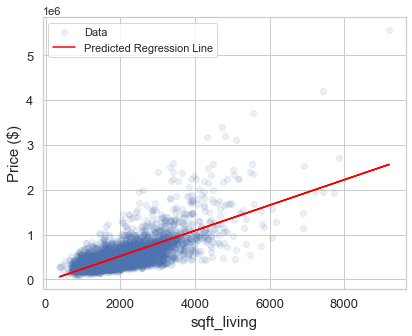

In [38]:
plt.figure(figsize=(6.5,5))
plt.scatter(X_test_linear,y_test_linear,label="Data", alpha=.1)
plt.plot(X_test_linear,lr.predict(X_test_linear),color="red",label="Predicted Regression Line")
plt.xlabel("sqft_living", fontsize=15)
plt.ylabel("Price ($)", fontsize=15)
plt.xticks(fontsize=13)
plt.yticks(fontsize=13)
plt.legend()

# <span id="6"></span> Visualizing and Examining Data

This is not a very big data and we do not have too many features. Thus, we have chance to plot most of them and reach some useful analytical results. Drawing charts and examining the data before applying a model is a very good practice because we may detect some possible outliers or decide to do normalization. This is not a must but get know the data is always good. Then, I started with the histograms of dataframe.

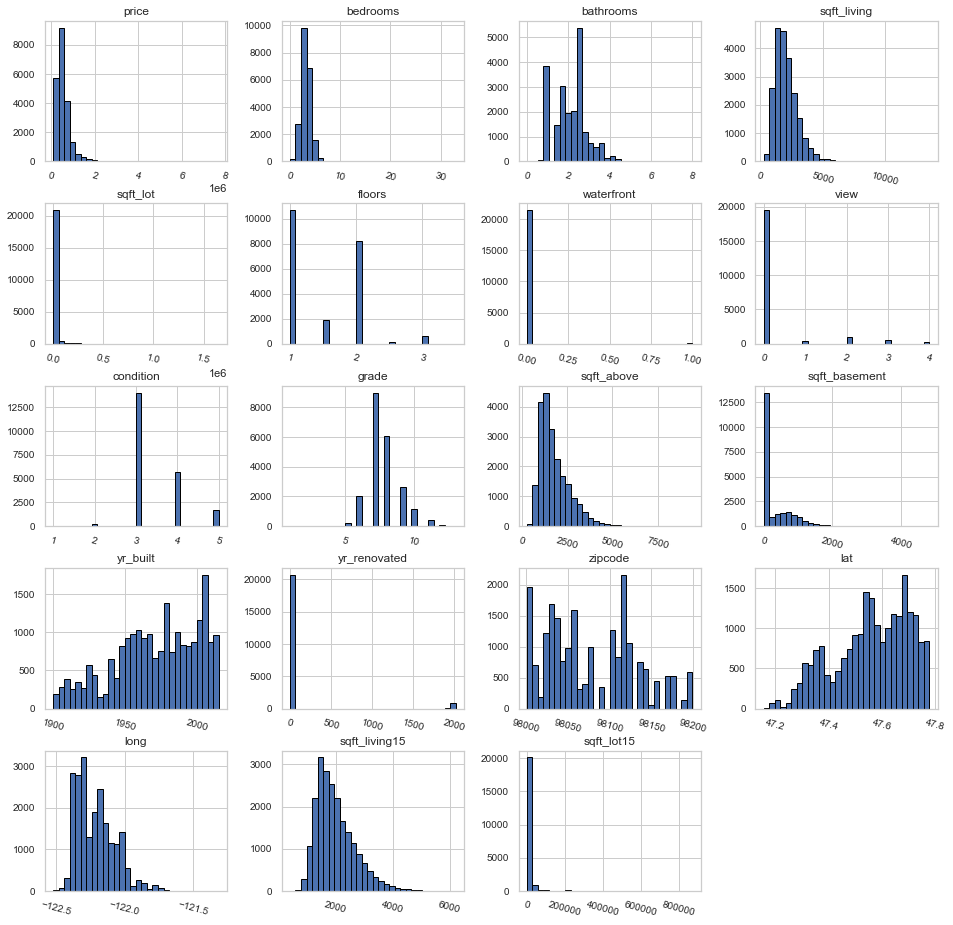

In [39]:
df1=data[['price', 'bedrooms', 'bathrooms', 'sqft_living',
    'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
    'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode',
    'lat', 'long', 'sqft_living15', 'sqft_lot15']]
h = df1.hist(bins=30,figsize=(16,16),xlabelsize='10',ylabelsize='10',xrot=-15, edgecolor="black")

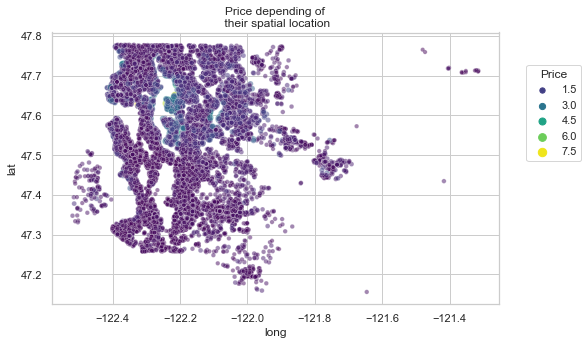

In [40]:
plt.figure(figsize=(8,5))
sns.scatterplot(data = data, x = 'long', y='lat', size ='price', hue ='price', palette="viridis", alpha=0.5)
plt.legend(title = 'Price', bbox_to_anchor = (1.05, 0.9), loc = 'upper left')
_ = plt.title("Price depending of\n their spatial location")

[Text(0.5, 0, 'Bathrooms'), Text(0, 0.5, 'Price')]

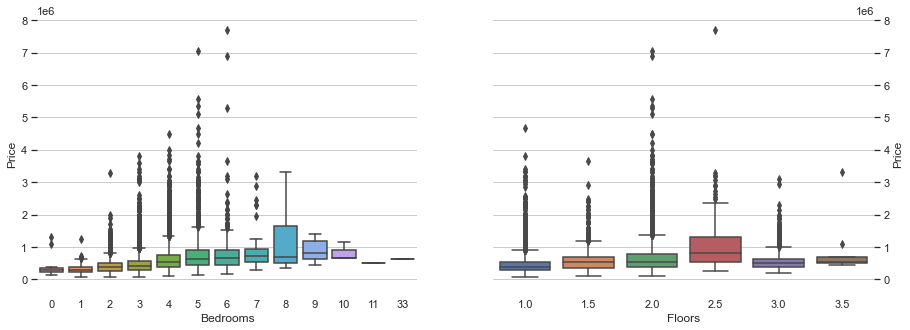

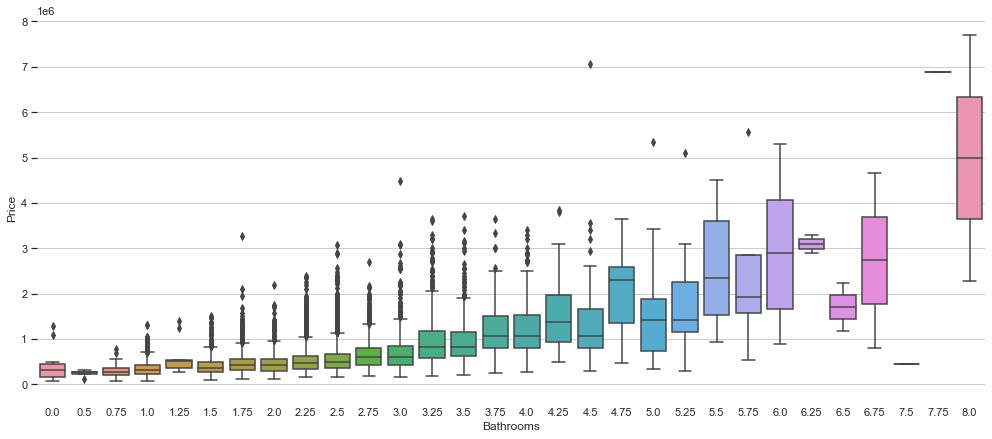

In [41]:
sns.set(style="whitegrid", font_scale=1)

f1, axes = plt.subplots(1, 2,figsize=(15,5))
sns.boxplot(x=data['bedrooms'],y=data['price'], ax=axes[0])
sns.boxplot(x=data['floors'],y=data['price'], ax=axes[1])
sns.despine(left=True, bottom=True)
axes[0].set(xlabel='Bedrooms', ylabel='Price')
axes[0].yaxis.tick_left()
axes[1].yaxis.set_label_position("right")
axes[1].yaxis.tick_right()
axes[1].set(xlabel='Floors', ylabel='Price')

f1, axe = plt.subplots(1, 1,figsize=(17,7))
sns.despine(left=True, bottom=True)
sns.boxplot(x=data['bathrooms'],y=data['price'], ax=axe)
axe.yaxis.tick_left()
axe.set(xlabel='Bathrooms', ylabel='Price')

In [42]:
data.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


<AxesSubplot:>

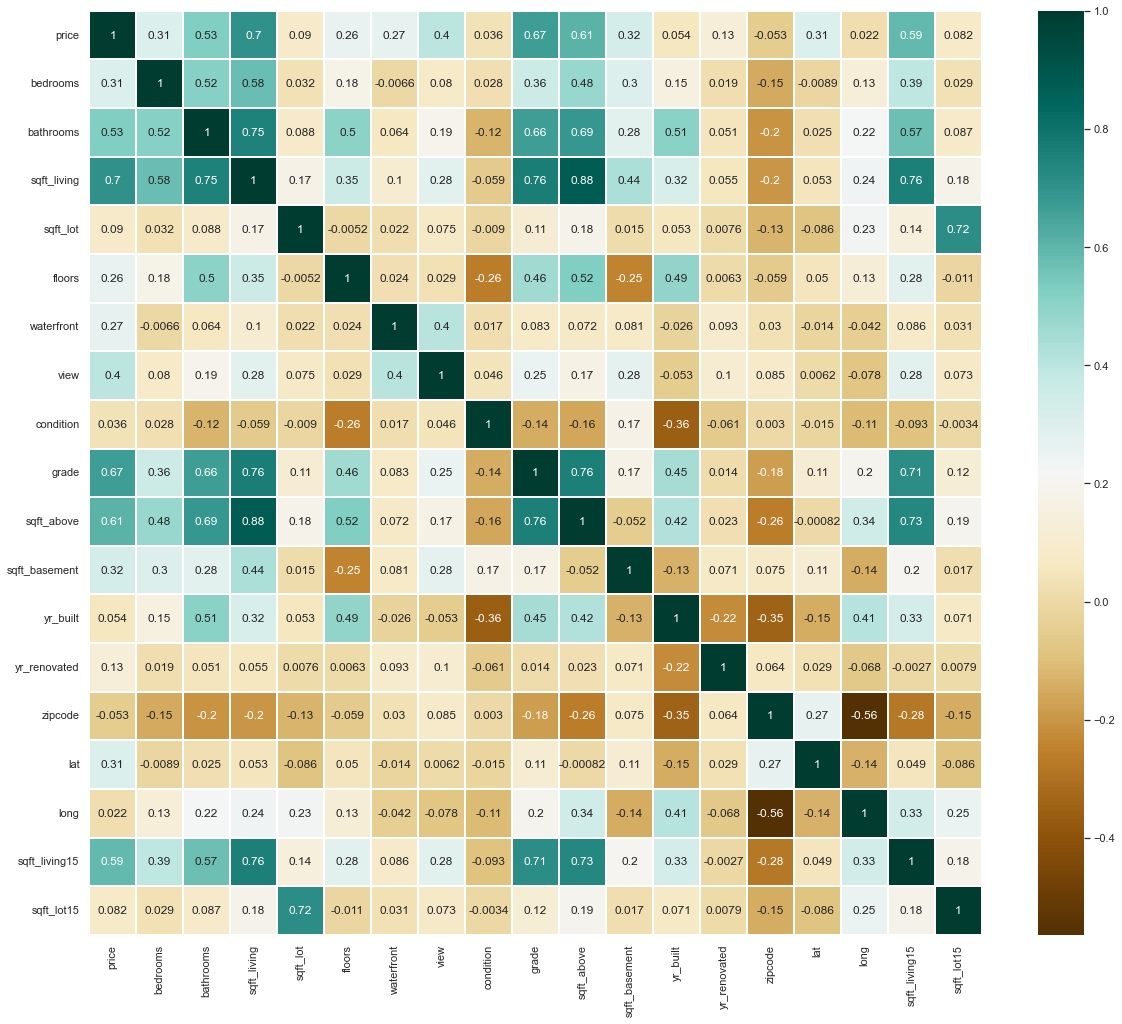

In [43]:
plt.figure(figsize=(20,17))
sns.heatmap(data= data.iloc[:,1:].corr(), cmap='BrBG', annot=True, linewidths=0.2)

# Data Preprocessing

A preprocessing on data might improve the model accuracy and make the model more reliable. It does not always have to improve our results but when we are conscious of the features and use a proper input, we might reach some outcomes easier.

In [44]:
df_dm=data.copy()
df_dm.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


## Binning

Data binning is a preprocessing technique used to reduce the effects of minor observation errors. I think it is worthwhile applying to some columns of this dataset. I applied binning to *yr_built* and *yr_renovated*. I added the ages and renovation ages of the houses when they were sold. Also, I partitioned these columns to intervals and you can observe this in the below **histograms**. 

<ipython-input-45-b02f773a1d0e>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_dm['age_rnv'][df_dm['age_rnv'].isnull()]=0
c:\Users\PC10\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
c:\Users\PC10\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


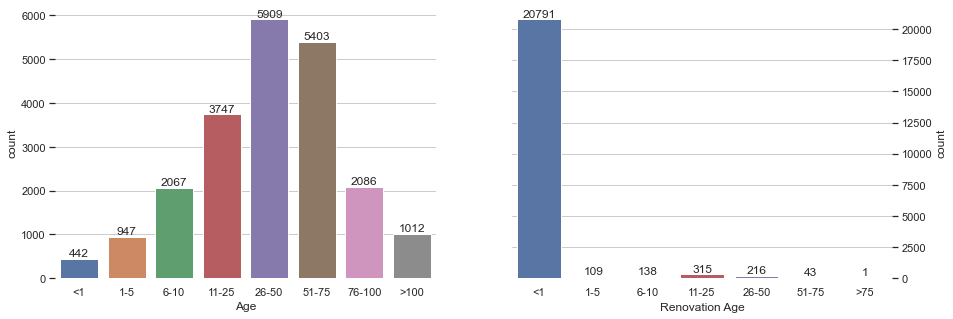

In [45]:
# just take the year from the date column
df_dm['sales_yr']=df_dm['date'].astype(str).str[:4]

# add the age of the buildings when the houses were sold as a new column
df_dm['age']=df_dm['sales_yr'].astype(int)-df_dm['yr_built']
# add the age of the renovation when the houses were sold as a new column
df_dm['age_rnv']=0
df_dm['age_rnv']=df_dm['sales_yr'][df_dm['yr_renovated']!=0].astype(int)-df_dm['yr_renovated'][df_dm['yr_renovated']!=0]
df_dm['age_rnv'][df_dm['age_rnv'].isnull()]=0

# partition the age into bins
bins = [-2,0,5,10,25,50,75,100,100000]
labels = ['<1','1-5','6-10','11-25','26-50','51-75','76-100','>100']
df_dm['age_binned'] = pd.cut(df_dm['age'], bins=bins, labels=labels)
# partition the age_rnv into bins
bins = [-2,0,5,10,25,50,75,100000]
labels = ['<1','1-5','6-10','11-25','26-50','51-75','>75']
df_dm['age_rnv_binned'] = pd.cut(df_dm['age_rnv'], bins=bins, labels=labels)

# histograms for the binned columns
f, axes = plt.subplots(1, 2,figsize=(15,5))
p1=sns.countplot(df_dm['age_binned'],ax=axes[0])
for p in p1.patches:
    height = p.get_height()
    p1.text(p.get_x()+p.get_width()/2,height + 50,height,ha="center")   
p2=sns.countplot(df_dm['age_rnv_binned'],ax=axes[1])
sns.despine(left=True, bottom=True)
for p in p2.patches:
    height = p.get_height()
    p2.text(p.get_x()+p.get_width()/2,height + 200,height,ha="center")
    
axes[0].set(xlabel='Age')
axes[0].yaxis.tick_left()
axes[1].yaxis.set_label_position("right")
axes[1].yaxis.tick_right()
axes[1].set(xlabel='Renovation Age');

# transform the factor values to be able to use in the model
df_dm = pd.get_dummies(df_dm, columns=['age_binned','age_rnv_binned'])

In [46]:
df_dm

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,age_binned_51-75,age_binned_76-100,age_binned_>100,age_rnv_binned_<1,age_rnv_binned_1-5,age_rnv_binned_6-10,age_rnv_binned_11-25,age_rnv_binned_26-50,age_rnv_binned_51-75,age_rnv_binned_>75
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,1,0,0,1,0,0,0,0,0,0
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,1,0,0,0,0,0,1,0,0,0
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,0,1,0,1,0,0,0,0,0,0
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,0,0,0,1,0,0,0,0,0,0
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,0,0,0,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21608,263000018,20140521T000000,360000.0,3,2.50,1530,1131,3.0,0,0,...,0,0,0,1,0,0,0,0,0,0
21609,6600060120,20150223T000000,400000.0,4,2.50,2310,5813,2.0,0,0,...,0,0,0,1,0,0,0,0,0,0
21610,1523300141,20140623T000000,402101.0,2,0.75,1020,1350,2.0,0,0,...,0,0,0,1,0,0,0,0,0,0
21611,291310100,20150116T000000,400000.0,3,2.50,1600,2388,2.0,0,0,...,0,0,0,1,0,0,0,0,0,0


In [47]:
df_dm = df_dm.iloc[:, 3:]
df_dm

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,...,age_binned_51-75,age_binned_76-100,age_binned_>100,age_rnv_binned_<1,age_rnv_binned_1-5,age_rnv_binned_6-10,age_rnv_binned_11-25,age_rnv_binned_26-50,age_rnv_binned_51-75,age_rnv_binned_>75
0,3,1.00,1180,5650,1.0,0,0,3,7,1180,...,1,0,0,1,0,0,0,0,0,0
1,3,2.25,2570,7242,2.0,0,0,3,7,2170,...,1,0,0,0,0,0,1,0,0,0
2,2,1.00,770,10000,1.0,0,0,3,6,770,...,0,1,0,1,0,0,0,0,0,0
3,4,3.00,1960,5000,1.0,0,0,5,7,1050,...,0,0,0,1,0,0,0,0,0,0
4,3,2.00,1680,8080,1.0,0,0,3,8,1680,...,0,0,0,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21608,3,2.50,1530,1131,3.0,0,0,3,8,1530,...,0,0,0,1,0,0,0,0,0,0
21609,4,2.50,2310,5813,2.0,0,0,3,8,2310,...,0,0,0,1,0,0,0,0,0,0
21610,2,0.75,1020,1350,2.0,0,0,3,7,1020,...,0,0,0,1,0,0,0,0,0,0
21611,3,2.50,1600,2388,2.0,0,0,3,8,1600,...,0,0,0,1,0,0,0,0,0,0


In [48]:
target = data.loc[:,'price']
target

0        221900.0
1        538000.0
2        180000.0
3        604000.0
4        510000.0
           ...   
21608    360000.0
21609    400000.0
21610    402101.0
21611    400000.0
21612    325000.0
Name: price, Length: 21613, dtype: float64

In [49]:
X_train_mr, X_test_mr, y_train_mr, y_test_mr = train_test_split(df_dm, target, test_size = 0.2, random_state=3)

In [50]:
features_no = ['bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors', 
                'sqft_above', 'sqft_basement', 'sqft_living15', 'sqft_lot15','age']

## Standardization

In [51]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
def Standard(X_train, X_test):
    sc.fit(X_train[features_no])
    X_train[features_no] = sc.transform(X_train[features_no])
    X_test[features_no] = sc.transform(X_test[features_no])

    return X_train, X_test

## Normalization

In [52]:
from sklearn.preprocessing import MinMaxScaler
mm = MinMaxScaler()
def Norm(X_train, X_test):
    mm.fit(X_train[features_no])
    X_train[features_no] = sc.transform(X_train[features_no])
    X_test[features_no] = sc.transform(X_test[features_no])

    return X_train, X_test

In [53]:
X_train, X_test, y_train, y_test = train_test_split(df_dm, target, test_size = 0.2, random_state=3)
X_train, X_test = Standard(X_train, X_test)

In [54]:
X_train

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,...,age_binned_51-75,age_binned_76-100,age_binned_>100,age_rnv_binned_<1,age_rnv_binned_1-5,age_rnv_binned_6-10,age_rnv_binned_11-25,age_rnv_binned_26-50,age_rnv_binned_51-75,age_rnv_binned_>75
14084,-0.397999,-0.150520,-0.622355,0.684582,-0.922559,0,0,3,7,-0.340263,...,1,0,0,1,0,0,0,0,0,0
13750,-0.397999,0.499129,-0.121152,2.204605,-0.922559,0,4,3,9,0.215418,...,0,0,0,1,0,0,0,0,0,0
619,-0.397999,-0.150520,-0.698624,-0.190197,-0.922559,0,0,3,8,-0.424823,...,0,0,0,1,0,0,0,0,0,0
18985,-0.397999,-1.449818,-1.178035,-0.240975,-0.922559,0,0,3,7,-1.125465,...,1,0,0,1,0,0,0,0,0,0
21382,0.669712,0.823953,0.587069,-0.195227,0.931244,0,0,3,8,1.000620,...,0,0,0,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6400,-0.397999,-0.475345,-1.494011,-0.242178,-0.922559,0,0,4,6,-1.306666,...,1,0,0,1,0,0,0,0,0,0
15288,-0.397999,-0.150520,-0.633250,-0.238569,-0.922559,0,0,3,7,-0.883864,...,0,0,0,1,0,0,0,0,0,0
11513,-0.397999,0.499129,0.064075,-0.178044,0.931244,0,0,3,7,0.420779,...,0,0,0,1,0,0,0,0,0,0
1688,-1.465710,-0.475345,-0.949226,2.791634,0.004342,0,0,5,7,-0.702664,...,1,0,0,1,0,0,0,0,0,0


# Multiple Regression

I determined ***features*** at first sight by looking at the previous sections and used in my first multiple linear regression. As in the simple regression, I printed the coefficients which the model uses for the predictions. However, this time we must use the below definition for our predictions, if we want to make calculations manually.

$$h_{\theta}(X)=\theta_{0}+\theta_{1}x_{1}+\theta_{2}x_{2}+...+\theta_{n}x_{n}$$

In [55]:
def mr(features):
    complex_model = lr.fit(X_train[features],y_train)

    print('Intercept: {}'.format(complex_model.intercept_))
    print('Coefficients: {}'.format(complex_model.coef_))

    pred = complex_model.predict(X_test[features])
    rmsecm = float(format(np.sqrt(metrics.mean_squared_error(y_test,pred)),'.3f'))
    rtrcm = float(format(complex_model.score(X_train[features],y_train),'.3f'))
    rtecm = float(format(complex_model.score(X_test[features],y_test),'.3f'))
    cv = float(format(cross_val_score(complex_model,df_dm[features],target,cv=5).mean(),'.3f'))

    return rmsecm, rtrcm, rtecm, cv

In [56]:
features = ['bedrooms','bathrooms','sqft_living','sqft_lot','floors','zipcode']

features1 = ['bedrooms','bathrooms','sqft_living','sqft_lot','floors','waterfront','view',
             'grade','age_binned_<1', 'age_binned_1-5', 'age_binned_6-10','age_binned_11-25', 
             'age_binned_26-50', 'age_binned_51-75','age_binned_76-100', 'age_binned_>100',
             'zipcode']

features2 = ['bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors',
       'waterfront', 'view', 'condition', 'grade', 'sqft_above',
       'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode', 'lat', 'long',
       'sqft_living15', 'sqft_lot15']     
       
features3 = ['bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors',
       'waterfront', 'view', 'condition', 'grade', 'sqft_above',
       'sqft_basement', 'zipcode', 'lat', 'long',
       'sqft_living15', 'sqft_lot15','age_binned_<1', 'age_binned_1-5', 'age_binned_6-10',
       'age_binned_11-25', 'age_binned_26-50', 'age_binned_51-75',
       'age_binned_76-100', 'age_binned_>100', 'age_rnv_binned_<1',
       'age_rnv_binned_1-5', 'age_rnv_binned_6-10', 'age_rnv_binned_11-25',
       'age_rnv_binned_26-50', 'age_rnv_binned_51-75', 'age_rnv_binned_>75']

rmsecm,rtrcm,rtecm,cv = mr(features)
rmsecm1,rtrcm1,rtecm1,cv1 = mr(features1)
rmsecm2,rtrcm2,rtecm2,cv2 = mr(features2)
rmsecm3,rtrcm3,rtecm3,cv3 = mr(features3)


r = evaluation.shape[0]
evaluation.loc[r] = ['Multiple Regression-1','selected features',rmsecm,rtrcm,rtecm,cv]
evaluation.loc[r+1] = ['Multiple Regression-2','selected features',rmsecm1,rtrcm1,rtecm1,cv1]
evaluation.loc[r+2] = ['Multiple Regression-3','selected features',rmsecm2,rtrcm2,rtecm2,cv2]
evaluation.loc[r+3] = ['Multiple Regression-4','selected features',rmsecm3,rtrcm3,rtecm3,cv3]
evaluation.sort_values(by = '5-Fold Cross Validation', ascending=False)

Intercept: -56739657.89403814
Coefficients: [-53286.90506075   8720.87017751 292215.41375874 -12084.0251986
  -3126.59834259    584.02282369]
Intercept: 15277378.445188163
Coefficients: [-3.50772110e+04  3.72120525e+04  1.57571245e+05 -9.60218747e+03
  5.58801511e+03  5.56285921e+05  4.78399848e+04  1.24143045e+05
 -8.88123227e+04 -1.05756567e+05 -1.04723750e+05 -1.35898725e+05
 -5.37336956e+04  8.41048129e+04  1.84153081e+05  2.20667166e+05
 -1.60046391e+02]
Intercept: 7973885.1441113725
Coefficients: [-3.29043367e+04  3.27731765e+04  8.17707021e+04  4.71970286e+03
  3.68427831e+03  5.61794985e+05  5.28174040e+04  2.48918356e+04
  9.57708783e+04  7.60014068e+04  2.74533146e+04 -2.70948034e+03
  2.26715091e+01 -5.80427853e+02  5.98629230e+05 -2.08875497e+05
  1.59203648e+04 -1.00902684e+04]
Intercept: 9111198.05959433
Coefficients: [ -31234.27844092   28981.01437949   81865.01176644    5103.85386467
   -6835.99809274  569817.40172272   54138.60906619   31727.5549558
   95230.05808434  

,Model,Details,Root Mean Squared Error (RMSE),R-squared (training),R-squared (test),5-Fold Cross Validation
4,Multiple Regression-4,selected features,191879.550,0.701,0.713,0.698
3,Multiple Regression-3,selected features,193693.989,0.698,0.708,0.695
2,Multiple Regression-2,selected features,209712.753,0.652,0.657,0.648
1,Multiple Regression-1,selected features,248514.011,0.514,0.519,0.512
0,Simple Linear Regression,Square Feet Living,248879.061,0.496,0.479,0.491


# <span id="15"></span> Regularization
<hr/>

**Regularization** is designed to address the problem of overfitting and undefitting. **Overfitting** means high variance and is usually caused by a complicated function that creates a lot of unnecessary curves and angles unrelated to the data. This function fits training data well but might cause poor results for the test set. On the other hand, **underfitting** means low variance and a very simple model. This might also cause poor results too. **Possible remedies** are adjusting features manually or using some model selection algoritms which brings an extra workload. Conversely, when we apply regularization, all the features are kept and the model adjusts $\theta_{j}$. This especially works when we have a lot of slightly useful features. There are two widely used regularization types (Ridge and Lasso Regressions) and in this section, I used them.

**When to use ridge vs lasso regression:**
*  Many small/medium sized effects: use *ridge*.
*  Only a few variables with medium/large effect: use *lasso*.

## <span id="16"></span> Ridge Regression
Ridge regression is called **L2 regularization** and by adding a penalty, we obtain the below equation

$$RSS_{RIDGE} = \sum_{i=1}^{m}(h_{\theta}(x_{i})-y_{i})^{2} + \alpha \sum_{j=1}^{n}\theta^{2}_{j}$$

By changing the $\alpha$ value, we can control the amount of the regularization. When we increase $\alpha$, regularization increases and the opposite is valid too. As a result of this, I selected different $\alpha$ values and used a linear regression without regularization in order to observe the differences easily.

In [57]:
def Ridge(alpha):
    complex_model = linear_model.Ridge(alpha=alpha)
    complex_model.fit(X_train[features],y_train)

    pred = complex_model.predict(X_test[features])
    rmsecm = float(format(np.sqrt(metrics.mean_squared_error(y_test,pred)),'.3f'))
    rtrcm = float(format(complex_model.score(X_train[features],y_train),'.3f'))
    rtecm = float(format(complex_model.score(X_test[features],y_test),'.3f'))
    cv = float(format(cross_val_score(complex_model,df_dm[features],target,cv=5).mean(),'.3f'))

    return rmsecm, rtrcm, rtecm, cv

In [58]:
rmsecm1,rtrcm1,rtecm1,cv1 = Ridge(1)
rmsecm2,rtrcm2,rtecm2,cv2 = Ridge(100)
rmsecm3,rtrcm3,rtecm3,cv3 = Ridge(1000)

r = evaluation.shape[0]
evaluation.loc[r] = ['Ridge Regression','alpha=1, all features',rmsecm1,rtrcm1,rtecm1,cv1]
evaluation.loc[r+1] = ['Ridge Regression','alpha=100, all features',rmsecm2,rtrcm2,rtecm2,cv2]
evaluation.loc[r+2] = ['Ridge Regression','alpha=1000, all features',rmsecm3,rtrcm3,rtecm3,cv3]
evaluation.sort_values(by = '5-Fold Cross Validation', ascending=False)

,Model,Details,Root Mean Squared Error (RMSE),R-squared (training),R-squared (test),5-Fold Cross Validation
4,Multiple Regression-4,selected features,191879.550,0.701,0.713,0.698
3,Multiple Regression-3,selected features,193693.989,0.698,0.708,0.695
2,Multiple Regression-2,selected features,209712.753,0.652,0.657,0.648
1,Multiple Regression-1,selected features,248514.011,0.514,0.519,0.512
5,Ridge Regression,"alpha=1, all features",248513.385,0.514,0.519,0.512
6,Ridge Regression,"alpha=100, all features",248468.579,0.514,0.519,0.512
7,Ridge Regression,"alpha=1000, all features",249125.064,0.510,0.516,0.512
0,Simple Linear Regression,Square Feet Living,248879.061,0.496,0.479,0.491


## <span id="17"></span> Lasso Regression

Lasso regression is called **L1 regularization** and it is defined as

$$RSS_{LASSO} = \sum_{i=1}^{m}(h_{\theta}(x_{i})-y_{i})^{2} + \alpha \sum_{j=1}^{n}|\theta_{j}|$$

The main difference between ridge and lasso is the penalty but $\alpha$ works the same way.   

In [59]:
def Lasso(alpha):
    complex_model = linear_model.Lasso(alpha=alpha)
    complex_model.fit(X_train[features],y_train)

    pred = complex_model.predict(X_test[features])
    rmsecm = float(format(np.sqrt(metrics.mean_squared_error(y_test,pred)),'.3f'))
    rtrcm = float(format(complex_model.score(X_train[features],y_train),'.3f'))
    rtecm = float(format(complex_model.score(X_test[features],y_test),'.3f'))
    cv = float(format(cross_val_score(complex_model,df_dm[features],target,cv=5).mean(),'.3f'))

    return rmsecm, rtrcm, rtecm, cv

In [60]:
rmsecm1,rtrcm1,rtecm1,cv1 = Lasso(1)
rmsecm2,rtrcm2,rtecm2,cv2 = Lasso(100)
rmsecm3,rtrcm3,rtecm3,cv3 = Lasso(1000)

r = evaluation.shape[0]
evaluation.loc[r] = ['Lasso Regression','alpha=1, all features',rmsecm1,rtrcm1,rtecm1,cv1]
evaluation.loc[r+1] = ['Lasso Regression','alpha=100, all features',rmsecm2,rtrcm2,rtecm2,cv2]
evaluation.loc[r+2] = ['Lasso Regression','alpha=1000, all features',rmsecm3,rtrcm3,rtecm3,cv3]
evaluation.sort_values(by = '5-Fold Cross Validation', ascending=False)

,Model,Details,Root Mean Squared Error (RMSE),R-squared (training),R-squared (test),5-Fold Cross Validation
4,Multiple Regression-4,selected features,191879.550,0.701,0.713,0.698
3,Multiple Regression-3,selected features,193693.989,0.698,0.708,0.695
2,Multiple Regression-2,selected features,209712.753,0.652,0.657,0.648
1,Multiple Regression-1,selected features,248514.011,0.514,0.519,0.512
5,Ridge Regression,"alpha=1, all features",248513.385,0.514,0.519,0.512
6,Ridge Regression,"alpha=100, all features",248468.579,0.514,0.519,0.512
7,Ridge Regression,"alpha=1000, all features",249125.064,0.510,0.516,0.512
8,Lasso Regression,"alpha=1, all features",248514.005,0.514,0.519,0.512
9,Lasso Regression,"alpha=100, all features",248513.614,0.514,0.519,0.512
10,Lasso Regression,"alpha=1000, all features",248527.993,0.514,0.519,0.512


# <span id="18"></span> Polynomial Regression
<hr/>

For the linear models, the main idea is to fit a straight line to our data. However, if the data has a quadratic distribution, this time choosing a quadratic function and applying a polynomial transformation may give us better results. This time the hypothesis function is defined as

$$h_{\theta}(X)=\theta_{0}+\theta_{1}x+\theta_{2}x^{2}+...+\theta_{n}x^{n}$$

Since there are many variations for the polynomial regression, I prefered to show results by a new table and it can be seen from the below table that polynomial transformation improved the model fit a lot. On the other hand, while using polynomial transformation and deciding to degree, we should be very careful because it **migh cause overfitting**. Also, in the below table overfitting exists for some models. The 5-fold cross validation metrics are negative or low for these models although they have very high R-squared values for the training set.

In [61]:
def Poly(features,degree):
    polyfeat = PolynomialFeatures(degree=degree)
    X_allpoly = polyfeat.fit_transform(df_dm[features])
    X_trainpoly = polyfeat.fit_transform(X_train[features])
    X_testpoly = polyfeat.fit_transform(X_test[features])
    poly = lr.fit(X_trainpoly, y_train)

    pred = poly.predict(X_testpoly)
    rmsepoly = float(format(np.sqrt(metrics.mean_squared_error(y_test,pred)),'.3f'))
    rtrpoly = float(format(poly.score(X_trainpoly,y_train),'.3f'))
    rtepoly = float(format(poly.score(X_testpoly,y_test),'.3f'))
    cv = float(format(cross_val_score(lr,X_allpoly,target,cv=5).mean(),'.3f'))

    return rmsepoly, rtrpoly, rtepoly, cv

def Poly_Ridge(features,degree,alpha):
    polyfeat = PolynomialFeatures(degree=degree)
    X_allpoly = polyfeat.fit_transform(df_dm[features])
    X_trainpoly = polyfeat.fit_transform(X_train[features])
    X_testpoly = polyfeat.fit_transform(X_test[features])
    poly = linear_model.Ridge(alpha=alpha).fit(X_trainpoly, y_train)

    pred6 = poly.predict(X_testpoly)
    rmsepoly6 = float(format(np.sqrt(metrics.mean_squared_error(y_test,pred6)),'.3f'))
    rtrpoly6 = float(format(poly.score(X_trainpoly,y_train),'.3f'))
    rtepoly6 = float(format(poly.score(X_testpoly,y_test),'.3f'))
    cv6 = float(format(cross_val_score(linear_model.Ridge(alpha=alpha),X_allpoly,target,cv=5).mean(),'.3f'))

    return rmsepoly6, rtrpoly6, rtepoly6, cv6

def Poly_Lasso(features,degree,alpha):
    polyfeat = PolynomialFeatures(degree=degree)
    X_allpoly = polyfeat.fit_transform(df_dm[features])
    X_trainpoly = polyfeat.fit_transform(X_train[features])
    X_testpoly = polyfeat.fit_transform(X_test[features])
    poly = linear_model.Lasso(alpha=alpha).fit(X_trainpoly, y_train)

    pred6 = poly.predict(X_testpoly)
    rmsepoly6 = float(format(np.sqrt(metrics.mean_squared_error(y_test,pred6)),'.3f'))
    rtrpoly6 = float(format(poly.score(X_trainpoly,y_train),'.3f'))
    rtepoly6 = float(format(poly.score(X_testpoly,y_test),'.3f'))
    cv6 = float(format(cross_val_score(linear_model.Lasso(alpha=alpha),X_allpoly,target,cv=5).mean(),'.3f'))

    return rmsepoly6, rtrpoly6, rtepoly6, cv6   

In [62]:
evaluation_poly = pd.DataFrame({'Model': [],
                           'Details':[],
                           'Root Mean Squared Error (RMSE)':[],
                           'R-squared (training)':[],
                           'R-squared (test)':[],
                           '5-Fold Cross Validation':[]})
# Selected Feature

features = ['bedrooms','bathrooms','sqft_living','sqft_lot','floors','waterfront','view',
             'grade','yr_built','zipcode']

rmsepoly1,rtrpoly1,rtepoly1,cv1 = Poly(features, 2)
rmsepoly2,rtrpoly2,rtepoly2,cv2 = Poly(features, 3)

#Selected Feature

features = ['bedrooms','bathrooms','sqft_living','sqft_lot','floors','waterfront','view',
            'condition','grade','sqft_above','sqft_basement','yr_built','yr_renovated',
            'zipcode','lat','long','sqft_living15','sqft_lot15']

rmsepoly3,rtrpoly3,rtepoly3,cv3 = Poly(features, 2)
rmsepoly4,rtrpoly4,rtepoly4,cv4 = Poly(features, 3)

# All Feature

features = ['bedrooms','bathrooms','sqft_living','sqft_lot','floors','waterfront',
            'view','condition','grade','sqft_above','sqft_basement','age_binned_<1', 
            'age_binned_1-5', 'age_binned_6-10','age_binned_11-25', 'age_binned_26-50',
            'age_binned_51-75','age_binned_76-100', 'age_binned_>100','age_rnv_binned_<1',
            'age_rnv_binned_1-5', 'age_rnv_binned_6-10', 'age_rnv_binned_11-25',
            'age_rnv_binned_26-50', 'age_rnv_binned_51-75', 'age_rnv_binned_>75',
            'zipcode','lat','long','sqft_living15','sqft_lot15']

rmsepoly5,rtrpoly5,rtepoly5,cv5 = Poly(features, 2)

# Ridge Regularization + Polynomial Regression 

rmsepoly6,rtrpoly6,rtepoly6,cv6 = Poly_Ridge(features,2,1)
rmsepoly7,rtrpoly7,rtepoly7,cv7 = Poly_Ridge(features,2,50000)

# Lasso Regularization + Polynomial Regression 

rmsepoly8,rtrpoly8,rtepoly8,cv8 = Poly_Lasso(features,2,1)
rmsepoly9,rtrpoly9,rtepoly9,cv9 = Poly_Lasso(features,2,50000)

r = evaluation_poly.shape[0]
evaluation_poly.loc[r] = ['Polynomial Regression','degree=2, selected features, no preprocessing',rmsepoly1,rtrpoly1,rtepoly1,cv1]
evaluation_poly.loc[r+1] = ['Polynomial Regression','degree=3, selected features, no preprocessing',rmsepoly2,rtrpoly2,rtepoly2,cv2]
evaluation_poly.loc[r+2] = ['Polynomial Regression','degree=2, all features, no preprocessing',rmsepoly3,rtrpoly3,rtepoly3,cv3]
evaluation_poly.loc[r+3] = ['Polynomial Regression','degree=3, all features, no preprocessing',rmsepoly4,rtrpoly4,rtepoly4,cv4]
evaluation_poly.loc[r+4] = ['Polynomial Regression','degree=2, all features',rmsepoly5,rtrpoly5,rtepoly5,cv5]
evaluation_poly.loc[r+5] = ['Polynomial Ridge Regression','alpha=1, degree=2, all features',rmsepoly6,rtrpoly6,rtepoly6,cv6]
evaluation_poly.loc[r+6] = ['Polynomial Ridge Regression','alpha=50000, degree=2, all features',rmsepoly7,rtrpoly7,rtepoly7,cv7]
evaluation_poly.loc[r+7] = ['Polynomial Lasso Regression','alpha=1, degree=2, all features',rmsepoly8,rtrpoly8,rtepoly8,cv8]
evaluation_poly.loc[r+8] = ['Polynomial Lasso Regression','alpha=50000, degree=2, all features',rmsepoly9,rtrpoly9,rtepoly9,cv9]
evaluation_poly.sort_values(by = '5-Fold Cross Validation', ascending=False)

c:\Users\PC10\anaconda3\lib\site-packages\sklearn\linear_model\_ridge.py:157: LinAlgWarning: Ill-conditioned matrix (rcond=2.76258e-19): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True, overwrite_a=True).T
c:\Users\PC10\anaconda3\lib\site-packages\sklearn\linear_model\_ridge.py:157: LinAlgWarning: Ill-conditioned matrix (rcond=9.24489e-22): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True, overwrite_a=True).T
c:\Users\PC10\anaconda3\lib\site-packages\sklearn\linear_model\_ridge.py:157: LinAlgWarning: Ill-conditioned matrix (rcond=7.66815e-22): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True, overwrite_a=True).T
c:\Users\PC10\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.279e+14, tolerance: 2.358e+11
  model 

,Model,Details,Root Mean Squared Error (RMSE),R-squared (training),R-squared (test),5-Fold Cross Validation
2,Polynomial Regression,"degree=2, all features, no preprocessing",151162.609,0.830,0.822,0.813
6,Polynomial Ridge Regression,"alpha=50000, degree=2, all features",172246.927,0.763,0.769,0.791
8,Polynomial Lasso Regression,"alpha=50000, degree=2, all features",181055.236,0.736,0.745,0.779
7,Polynomial Lasso Regression,"alpha=1, degree=2, all features",166201.834,0.807,0.785,0.778
0,Polynomial Regression,"degree=2, selected features, no preprocessing",190533.483,0.731,0.717,0.714
1,Polynomial Regression,"degree=3, selected features, no preprocessing",200661.639,0.749,0.686,0.517
3,Polynomial Regression,"degree=3, all features, no preprocessing",301312.009,0.876,0.293,0.204
5,Polynomial Ridge Regression,"alpha=1, degree=2, all features",150447.459,0.837,0.824,-3198.424
4,Polynomial Regression,"degree=2, all features",561361.121,0.841,-1.455,-16909.596


# <span id="19"></span> Support Vector Regression 
<hr/>

**Support vector machines (SVMs)** are a set of supervised learning methods used for classification, regression and outliers detection.

The advantages of support vector machines are:

* Effective in high dimensional spaces.
* Still effective in cases where number of dimensions is greater than the number of samples.
* Uses a subset of training points in the decision function (called support vectors), so it is also memory efficient.
* Versatile: different Kernel functions can be specified for the decision function. Common kernels are provided, but it is also possible to specify custom kernels.

The disadvantages of support vector machines include:

* If the number of features is much greater than the number of samples, avoid over-fitting in choosing Kernel functions and regularization term is crucial.
* SVMs do not directly provide probability estimates, these are calculated using an expensive five-fold cross-validation (see Scores and probabilities, below).

The method of Support Vector Classification can be extended to solve regression problems. This method is called **Support Vector Regression.**

The model produced by support vector classification (as described above) depends only on a subset of the training data, because the cost function for building the model does not care about training points that lie beyond the margin. Analogously, the model produced by Support Vector Regression depends only on a subset of the training data, because the cost function ignores samples whose prediction is close to their target.

There are three different implementations of Support Vector Regression: SVR, NuSVR and LinearSVR. LinearSVR provides a faster implementation than SVR but only considers the linear kernel, while NuSVR implements a slightly different formulation than SVR and LinearSVR. See Implementation details for further details.

As with classification classes, the fit method will take as argument vectors X, y, only that in this case y is expected to have floating point values instead of integer values:

# <span id="19"></span> k-NN Regression 

I included k-NN regression in this kernel but actually, I did not expect to obtain a good result by using it. Also, k-NN does not give much insight. It is a very simple method and the idea behind the algorithm is similar to the k-NN classification. Briefly, it uses the weighted average, median or another statistic you want of k-nearest instances.

The evaluation metrics for the training, test sets and different *k* values were given in the below table. It can be seen that, k-NN was not very successful as expected. 

In [63]:
evaluation_svr = pd.DataFrame({'Model': [],'Details':[],'Root Mean Squared Error (RMSE)':[],'R-squared (training)':[],'R-squared (test)':[], '5-Fold Cross Validation':[]})

from sklearn.pipeline import Pipeline
from sklearn.neighbors import KNeighborsRegressor

# All Feature

features = ['bedrooms','bathrooms','sqft_living','sqft_lot','floors','waterfront',
            'view','condition','grade','sqft_above','sqft_basement','age_binned_<1', 
            'age_binned_1-5', 'age_binned_6-10','age_binned_11-25', 'age_binned_26-50',
            'age_binned_51-75','age_binned_76-100', 'age_binned_>100','age_rnv_binned_<1',
            'age_rnv_binned_1-5', 'age_rnv_binned_6-10', 'age_rnv_binned_11-25',
            'age_rnv_binned_26-50', 'age_rnv_binned_51-75', 'age_rnv_binned_>75',
            'zipcode','lat','long','sqft_living15','sqft_lot15']

# Linear SVR

def SVR(c: int):
    svr_lin = svm.LinearSVR(C=c)
    svr_lin.fit(X_train[features], y_train)
    pred = svr_lin.predict(X_test[features])

    rmse = float(format(np.sqrt(metrics.mean_squared_error(y_test,pred)),'.3f'))
    rtrk = float(format(svr_lin.score(X_train[features],y_train),'.3f'))
    rtek = float(format(svr_lin.score(X_test[features],y_test),'.3f'))
    cv = float(format(cross_val_score(svr_lin,df_dm[features],target,cv=5).mean(),'.3f'))

    return rmse, rtrk, rtek, cv

def KNN(n: int):
    knn = KNeighborsRegressor(n_neighbors=n)
    knn.fit(X_train[features], y_train)
    pred = knn.predict(X_test[features])

    rmse = float(format(np.sqrt(metrics.mean_squared_error(y_test,pred)),'.3f'))
    rtrk= float(format(knn.score(X_train[features],y_train),'.3f'))
    rtek = float(format(knn.score(X_test[features],y_test),'.3f'))
    cv = float(format(cross_val_score(knn,df_dm[features],target,cv=5).mean(),'.3f'))

    return rmse, rtrk, rtek, cv

rmseknn1,rtrknn1,rteknn1,cv1 = SVR(1000)
rmseknn2,rtrknn2,rteknn2,cv2 = SVR(10)
rmseknn3,rtrknn3,rteknn3,cv3 = SVR(100)

rmseknn4,rtrknn4,rteknn4,cv4 = KNN(10)
rmseknn5,rtrknn5,rteknn5,cv5 = KNN(20)
rmseknn6,rtrknn6,rteknn6,cv6 = KNN(30)

r = evaluation_svr.shape[0]

evaluation_svr.loc[r] = ['Linear SVR','c=1000, all features',rmseknn1,rtrknn1,rteknn1,cv1]
evaluation_svr.loc[r+1] = ['Linear SVR','c=10, all features',rmseknn2,rtrknn2,rteknn2,cv2]
evaluation_svr.loc[r+2] = ['Linear SVR','c=100, all features',rmseknn3,rtrknn3,rteknn3,cv3]
evaluation_svr.loc[r+3] = ['KNN','n=10, all features',rmseknn4,rtrknn4,rteknn4,cv4]
evaluation_svr.loc[r+4] = ['KNN','n=20, all features',rmseknn5,rtrknn5,rteknn5,cv5]
evaluation_svr.loc[r+5] = ['KNN','n=30, all features',rmseknn6,rtrknn6,rteknn6,cv6]

evaluation_svr.sort_values(by = '5-Fold Cross Validation', ascending=False)


c:\Users\PC10\anaconda3\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
c:\Users\PC10\anaconda3\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
c:\Users\PC10\anaconda3\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
c:\Users\PC10\anaconda3\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
c:\Users\PC10\anaconda3\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
c:\Users\PC10\anaconda3\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of ite

,Model,Details,Root Mean Squared Error (RMSE),R-squared (training),R-squared (test),5-Fold Cross Validation
3,KNN,"n=10, all features",172141.222,0.813,0.769,0.500
4,KNN,"n=20, all features",177981.418,0.773,0.753,0.492
5,KNN,"n=30, all features",184260.607,0.749,0.735,0.483
2,Linear SVR,"c=100, all features",441775.367,-0.491,-0.520,0.285
1,Linear SVR,"c=10, all features",463053.809,-0.629,-0.670,0.238
0,Linear SVR,"c=1000, all features",366575.682,-0.045,-0.047,0.125


In [64]:
final = pd.concat([evaluation, evaluation_poly, evaluation_svr], axis = 0)
final.sort_values(by='5-Fold Cross Validation', ascending=False, inplace=True)
final.reset_index(inplace=True)
final=final.iloc[:,1:]
final

,Model,Details,Root Mean Squared Error (RMSE),R-squared (training),R-squared (test),5-Fold Cross Validation
0,Polynomial Regression,"degree=2, all features, no preprocessing",151162.609,0.830,0.822,0.813
1,Polynomial Ridge Regression,"alpha=50000, degree=2, all features",172246.927,0.763,0.769,0.791
2,Polynomial Lasso Regression,"alpha=50000, degree=2, all features",181055.236,0.736,0.745,0.779
3,Polynomial Lasso Regression,"alpha=1, degree=2, all features",166201.834,0.807,0.785,0.778
4,Polynomial Regression,"degree=2, selected features, no preprocessing",190533.483,0.731,0.717,0.714
5,Multiple Regression-4,selected features,191879.550,0.701,0.713,0.698
6,Multiple Regression-3,selected features,193693.989,0.698,0.708,0.695
7,Multiple Regression-2,selected features,209712.753,0.652,0.657,0.648
8,Polynomial Regression,"degree=3, selected features, no preprocessing",200661.639,0.749,0.686,0.517
9,Ridge Regression,"alpha=1, all features",248513.385,0.514,0.519,0.512


# <span id="19"></span> Decision Tree Regression

**Decision Trees (DTs)** are a non-parametric supervised learning method used for classification and regression. The goal is to create a model that predicts the value of a target variable by learning simple decision rules inferred from the data features. A tree can be seen as a piecewise constant approximation.

Some advantages of decision trees are:

* Simple to understand and to interpret. Trees can be visualized.
* Requires little data preparation. Other techniques often require data normalization, dummy variables need to be created and blank values to be removed. Note however that this module does not support missing values.
* The cost of using the tree (i.e., predicting data) is logarithmic in the number of data points used to train the tree.
* Able to handle both numerical and categorical data. However scikit-learn implementation does not support categorical variables for now. Other techniques are usually specialized in analyzing datasets that have only one type of variable. See algorithms for more information.
* Able to handle multi-output problems.
* Uses a white box model. If a given situation is observable in a model, the explanation for the condition is easily explained by boolean logic. By contrast, in a black box model (e.g., in an artificial neural network), results may be more difficult to interpret.
* Possible to validate a model using statistical tests. That makes it possible to account for the reliability of the model.
* Performs well even if its assumptions are somewhat violated by the true model from which the data were generated.


The disadvantages of decision trees include:

* Decision-tree learners can create over-complex trees that do not generalize the data well. This is called overfitting. Mechanisms such as pruning, setting the minimum number of samples required at a leaf node or setting the maximum depth of the tree are necessary to avoid this problem.
* Decision trees can be unstable because small variations in the data might result in a completely different tree being generated. This problem is mitigated by using decision trees within an ensemble.
* Predictions of decision trees are neither smooth nor continuous, but piecewise constant approximations as seen in the above figure. Therefore, they are not good at extrapolation.
* The problem of learning an optimal decision tree is known to be NP-complete under several aspects of optimality and even for simple concepts. Consequently, practical decision-tree learning algorithms are based on heuristic algorithms such as the greedy algorithm where locally optimal decisions are made at each node. Such algorithms cannot guarantee to return the globally optimal decision tree. This can be mitigated by training multiple trees in an ensemble learner, where the features and samples are randomly sampled with replacement.
* There are concepts that are hard to learn because decision trees do not express them easily, such as XOR, parity or multiplexer problems.
* Decision tree learners create biased trees if some classes dominate. It is therefore recommended to balance the dataset prior to fitting with the decision tree.

Decision trees can also be applied to regression problems, using the **DecisionTreeRegressor** class.

As in the classification setting, the fit method will take as argument arrays X and y, only that in this case y is expected to have floating point values instead of integer values:

In [65]:
from sklearn.tree import DecisionTreeRegressor

evaluation_dtr = pd.DataFrame({'Model': [],'Details':[],'Root Mean Squared Error (RMSE)':[],'R-squared (training)':[],'R-squared (test)':[], '5-Fold Cross Validation':[]})

def DecisionTree(max_depth: int, min_samples_split: int, min_samples_leaf: int ):
    dtr = DecisionTreeRegressor(criterion = "squared_error", max_depth=max_depth, min_samples_split=min_samples_split, min_samples_leaf=min_samples_leaf, random_state=0)
    dtr.fit(X_train[features], y_train)
    pred = dtr.predict(X_test[features])

    rmse = float(format(np.sqrt(metrics.mean_squared_error(y_test,pred)),'.3f'))
    rtrk = float(format(dtr.score(X_train[features],y_train),'.3f'))
    rtek = float(format(dtr.score(X_test[features],y_test),'.3f'))
    cv = float(format(cross_val_score(dtr,df_dm[features],target,cv=5).mean(),'.3f'))

    return rmse, rtrk, rtek, cv

rmsedtr, rtrkdtr, rtekdtr, cv = DecisionTree(2,5,5)
rmsedtr1, rtrkdtr1, rtekdtr1, cv1 = DecisionTree(5,10,10)
rmsedtr2, rtrkdtr2, rtekdtr2, cv2 = DecisionTree(10,20,15)
rmsedtr3, rtrkdtr3, rtekdtr3, cv3 = DecisionTree(15,40,20)


r = evaluation_dtr.shape[0]

evaluation_dtr.loc[r] = ['Decision Tree','max_depth=2,min_split=5,min_leaf=5',rmsedtr,rtrkdtr,rtekdtr,cv]
evaluation_dtr.loc[r+1] = ['Decision Tree','max_depth=5,min_split=10,min_leaf=10',rmsedtr1,rtrkdtr1,rtekdtr1,cv1]
evaluation_dtr.loc[r+2] = ['Decision Tree','max_depth=10,min_split=20,min_leaf=15',rmsedtr2,rtrkdtr2,rtekdtr2,cv2]
evaluation_dtr.loc[r+3] = ['Decision Tree','max_depth=15,min_split=40,min_leaf=20 ',rmsedtr3,rtrkdtr3,rtekdtr3,cv3]

evaluation_dtr.sort_values(by = '5-Fold Cross Validation', ascending=False)

,Model,Details,Root Mean Squared Error (RMSE),R-squared (training),R-squared (test),5-Fold Cross Validation
2,Decision Tree,"max_depth=10,min_split=20,min_leaf=15",151304.117,0.845,0.822,0.774
3,Decision Tree,"max_depth=15,min_split=40,min_leaf=20",158209.280,0.847,0.805,0.770
1,Decision Tree,"max_depth=5,min_split=10,min_leaf=10",191155.522,0.740,0.715,0.685
0,Decision Tree,"max_depth=2,min_split=5,min_leaf=5",254578.448,0.498,0.495,0.483


In [66]:
final = pd.concat([final, evaluation_dtr], axis = 0)
final.sort_values(by='5-Fold Cross Validation', ascending=False, inplace=True)
final.reset_index(inplace=True)
final=final.iloc[:,1:]
final

,Model,Details,Root Mean Squared Error (RMSE),R-squared (training),R-squared (test),5-Fold Cross Validation
0,Polynomial Regression,"degree=2, all features, no preprocessing",151162.609,0.830,0.822,0.813
1,Polynomial Ridge Regression,"alpha=50000, degree=2, all features",172246.927,0.763,0.769,0.791
2,Polynomial Lasso Regression,"alpha=50000, degree=2, all features",181055.236,0.736,0.745,0.779
3,Polynomial Lasso Regression,"alpha=1, degree=2, all features",166201.834,0.807,0.785,0.778
4,Decision Tree,"max_depth=10,min_split=20,min_leaf=15",151304.117,0.845,0.822,0.774
5,Decision Tree,"max_depth=15,min_split=40,min_leaf=20",158209.280,0.847,0.805,0.770
6,Polynomial Regression,"degree=2, selected features, no preprocessing",190533.483,0.731,0.717,0.714
7,Multiple Regression-4,selected features,191879.550,0.701,0.713,0.698
8,Multiple Regression-3,selected features,193693.989,0.698,0.708,0.695
9,Decision Tree,"max_depth=5,min_split=10,min_leaf=10",191155.522,0.740,0.715,0.685


# <span id="19"></span> Random Forest Regression

A **random forest regressor.**

A random forest is a meta estimator that fits a number of classifying decision trees on various sub-samples of the dataset and uses averaging to improve the predictive accuracy and control over-fitting. The sub-sample size is controlled with the max_samples parameter if bootstrap=True (default), otherwise the whole dataset is used to build each tree.

In random forests, each tree in the ensemble is built from a sample drawn with replacement (i.e., a bootstrap sample) from the training set.

Furthermore, when splitting each node during the construction of a tree, the best split is found either from all input features or a random subset of size max_features. (See the parameter tuning guidelines for more details).

The purpose of these two sources of randomness is to decrease the variance of the forest estimator. Indeed, individual decision trees typically exhibit high variance and tend to overfit. The injected randomness in forests yield decision trees with somewhat decoupled prediction errors. By taking an average of those predictions, some errors can cancel out. Random forests achieve a reduced variance by combining diverse trees, sometimes at the cost of a slight increase in bias. In practice the variance reduction is often significant hence yielding an overall better model.

The scikit-learn implementation combines classifiers by averaging their probabilistic prediction, instead of letting each classifier vote for a single class.

In [67]:
from sklearn.ensemble import RandomForestRegressor

evaluation_rfr = pd.DataFrame({'Model': [],'Details':[],'Root Mean Squared Error (RMSE)':[],'R-squared (training)':[],'R-squared (test)':[], '5-Fold Cross Validation':[]})

def RFR(max_depth: int, n_estimators: int, min_samples_split: int, min_samples_leaf: int ):
    abr = RandomForestRegressor(n_estimators = n_estimators, max_features=None,criterion = "squared_error", 
    random_state = 1, max_depth=max_depth, min_samples_split=min_samples_split, min_samples_leaf=min_samples_leaf)
    abr.fit(X_train[features], y_train)
    pred = abr.predict(X_test[features])

    rmse = float(format(np.sqrt(metrics.mean_squared_error(y_test,pred)),'.3f'))
    rtrk = float(format(abr.score(X_train[features],y_train),'.3f'))
    rtek = float(format(abr.score(X_test[features],y_test),'.3f'))
    cv = float(format(cross_val_score(abr,df_dm[features],target,cv=5).mean(),'.3f'))

    return rmse, rtrk, rtek, cv

rmsedtr, rtrkdtr, rtekdtrr, cv = RFR(5,10,5,5)
rmsedtr1, rtrkdtr1, rtekdtr1, cv1 = RFR(10,50,10,10)
rmsedtr2, rtrkdtr2, rtekdtr2, cv2 = RFR(15,100,20,15)
rmsedtr3, rtrkdtr3, rtekdtr3, cv3 = RFR(20,150,40,20)

r = evaluation_rfr.shape[0]

evaluation_rfr.loc[r] = ['Random Forest','n_estimators = 10,max_depth=5,min_split=5,min_leaf=5',rmsedtr,rtrkdtr,rtekdtr,cv]
evaluation_rfr.loc[r+1] = ['Random Forest','n_estimators = 50, max_depth=10,min_split=10,min_leaf=10',rmsedtr1,rtrkdtr1,rtekdtr1,cv1]
evaluation_rfr.loc[r+2] = ['Random Forest','n_estimators = 100, max_depth=15,min_split=20,min_leaf=15',rmsedtr2,rtrkdtr2,rtekdtr2,cv2]
evaluation_rfr.loc[r+3] = ['Random Forest','n_estimators = 200, max_depth=20,min_split=40,min_leaf=20',rmsedtr3,rtrkdtr3,rtekdtr3,cv3]

evaluation_rfr.sort_values(by = '5-Fold Cross Validation', ascending=False)

,Model,Details,Root Mean Squared Error (RMSE),R-squared (training),R-squared (test),5-Fold Cross Validation
1,Random Forest,"n_estimators = 50, max_depth=10,min_split=10,m...",134199.352,0.886,0.860,0.837
2,Random Forest,"n_estimators = 100, max_depth=15,min_split=20,...",133992.252,0.879,0.860,0.835
3,Random Forest,"n_estimators = 200, max_depth=20,min_split=40,...",137829.524,0.862,0.852,0.823
0,Random Forest,"n_estimators = 10,max_depth=5,min_split=5,min_...",166256.740,0.795,0.495,0.754


In [68]:
final = pd.concat([final, evaluation_rfr], axis = 0)
final.sort_values(by='5-Fold Cross Validation', ascending=False, inplace=True)
final.reset_index(inplace=True)
final=final.iloc[:,1:]
final

,Model,Details,Root Mean Squared Error (RMSE),R-squared (training),R-squared (test),5-Fold Cross Validation
0,Random Forest,"n_estimators = 50, max_depth=10,min_split=10,m...",134199.352,0.886,0.860,0.837
1,Random Forest,"n_estimators = 100, max_depth=15,min_split=20,...",133992.252,0.879,0.860,0.835
2,Random Forest,"n_estimators = 200, max_depth=20,min_split=40,...",137829.524,0.862,0.852,0.823
3,Polynomial Regression,"degree=2, all features, no preprocessing",151162.609,0.830,0.822,0.813
4,Polynomial Ridge Regression,"alpha=50000, degree=2, all features",172246.927,0.763,0.769,0.791
5,Polynomial Lasso Regression,"alpha=50000, degree=2, all features",181055.236,0.736,0.745,0.779
6,Polynomial Lasso Regression,"alpha=1, degree=2, all features",166201.834,0.807,0.785,0.778
7,Decision Tree,"max_depth=10,min_split=20,min_leaf=15",151304.117,0.845,0.822,0.774
8,Decision Tree,"max_depth=15,min_split=40,min_leaf=20",158209.280,0.847,0.805,0.770
9,Random Forest,"n_estimators = 10,max_depth=5,min_split=5,min_...",166256.740,0.795,0.495,0.754


# Ada Boost Regressor

An AdaBoost regressor.

An AdaBoost regressor is a meta-estimator that begins by fitting a regressor on the original dataset and then fits additional copies of the regressor on the same dataset but where the weights of instances are adjusted according to the error of the current prediction. As such, subsequent regressors focus more on difficult cases.

This class implements the algorithm known as AdaBoost.R2.

In [69]:
from sklearn.ensemble import AdaBoostRegressor

evaluation_abr = pd.DataFrame({'Model': [],'Details':[],'Root Mean Squared Error (RMSE)':[],'R-squared (training)':[],'R-squared (test)':[], '5-Fold Cross Validation':[]})

def Ada(max_depth: int, n_estimators: int, min_samples_split: int, min_samples_leaf: int):
    abr = AdaBoostRegressor(base_estimator = DecisionTreeRegressor(max_depth=max_depth, min_samples_split=min_samples_split, min_samples_leaf=min_samples_leaf),n_estimators=n_estimators, random_state=0)
    abr.fit(X_train[features], y_train)
    pred = abr.predict(X_test[features])

    rmseabr = float(format(np.sqrt(metrics.mean_squared_error(y_test,pred)),'.3f'))
    rtrkabr = float(format(abr.score(X_train[features],y_train),'.3f'))
    rtekabr = float(format(abr.score(X_test[features],y_test),'.3f'))
    cv = float(format(cross_val_score(abr,df_dm[features],target,cv=5).mean(),'.3f'))

    return rmseabr, rtrkabr, rtekabr, cv

rmseabr, rtrkabr, rtekabr, cv = Ada(10,10,100,50)
rmseabr1, rtrkabr1, rtekabr1, cv1 = Ada(10,50,100,50)
rmseabr2, rtrkabr2, rtekabr2, cv2 = Ada(10,100,100,50)
rmseabr3, rtrkabr3, rtekabr3, cv3 = Ada(10,150,100,50)

r = evaluation_abr.shape[0]

evaluation_abr.loc[r] = ['Ada boost with Decision Tree','n_estimators = 10, max_depth=10, min_split=100,min_leaf=50',rmseabr,rtrkabr,rtekabr,cv]
evaluation_abr.loc[r+1] = ['Ada boost with Decision Tree','n_estimators = 50, max_depth=10, min_split=100,min_leaf=50',rmseabr1,rtrkabr1,rtekabr2,cv1]
evaluation_abr.loc[r+2] = ['Ada boost with Decision Tree','n_estimators = 100, max_depth=10, min_split=100,min_leaf=50',rmseabr2,rtrkabr2,rtekabr2,cv2]
evaluation_abr.loc[r+3] = ['Ada boost with Decision Tree','n_estimators = 200, max_depth=10, min_split=100,min_leaf=50',rmseabr3,rtrkabr3,rtekabr3,cv3]

evaluation_abr.sort_values(by = '5-Fold Cross Validation', ascending=False)


,Model,Details,Root Mean Squared Error (RMSE),R-squared (training),R-squared (test),5-Fold Cross Validation
1,Ada boost with Decision Tree,"n_estimators = 50, max_depth=10, min_split=100...",129939.704,0.935,0.859,0.852
2,Ada boost with Decision Tree,"n_estimators = 100, max_depth=10, min_split=10...",134701.112,0.928,0.859,0.843
3,Ada boost with Decision Tree,"n_estimators = 200, max_depth=10, min_split=10...",135983.305,0.925,0.856,0.841
0,Ada boost with Decision Tree,"n_estimators = 10, max_depth=10, min_split=100...",133266.381,0.918,0.862,0.834


In [70]:
final = pd.concat([final, evaluation_abr], axis = 0)
final.sort_values(by='5-Fold Cross Validation', ascending=False, inplace=True)
final.reset_index(inplace=True)
final=final.iloc[:,1:]
final

,Model,Details,Root Mean Squared Error (RMSE),R-squared (training),R-squared (test),5-Fold Cross Validation
0,Ada boost with Decision Tree,"n_estimators = 50, max_depth=10, min_split=100...",129939.704,0.935,0.859,0.852
1,Ada boost with Decision Tree,"n_estimators = 100, max_depth=10, min_split=10...",134701.112,0.928,0.859,0.843
2,Ada boost with Decision Tree,"n_estimators = 200, max_depth=10, min_split=10...",135983.305,0.925,0.856,0.841
3,Random Forest,"n_estimators = 50, max_depth=10,min_split=10,m...",134199.352,0.886,0.860,0.837
4,Random Forest,"n_estimators = 100, max_depth=15,min_split=20,...",133992.252,0.879,0.860,0.835
5,Ada boost with Decision Tree,"n_estimators = 10, max_depth=10, min_split=100...",133266.381,0.918,0.862,0.834
6,Random Forest,"n_estimators = 200, max_depth=20,min_split=40,...",137829.524,0.862,0.852,0.823
7,Polynomial Regression,"degree=2, all features, no preprocessing",151162.609,0.830,0.822,0.813
8,Polynomial Ridge Regression,"alpha=50000, degree=2, all features",172246.927,0.763,0.769,0.791
9,Polynomial Lasso Regression,"alpha=50000, degree=2, all features",181055.236,0.736,0.745,0.779


# Gradient Boosting Regression

Gradient Boosting for regression.

GB builds an additive model in a forward stage-wise fashion; it allows for the optimization of arbitrary differentiable loss functions. In each stage a regression tree is fit on the negative gradient of the given loss function. GBDT is an accurate and effective off-the-shelf procedure that can be used for both regression and classification problems in a variety of areas including Web search ranking and ecology.

In [71]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import HistGradientBoostingRegressor

evaluation_gbr = pd.DataFrame({'Model': [],'Details':[],'Root Mean Squared Error (RMSE)':[],'R-squared (training)':[],'R-squared (test)':[], '5-Fold Cross Validation':[]})

def GBR(max_depth: int, n_estimators: int, learning_rate:int):
    rgr = GradientBoostingRegressor(max_depth=max_depth, learning_rate=learning_rate, n_estimators=n_estimators, random_state=0)
    rgr.fit(X_train[features], y_train)
    pred = rgr.predict(X_test[features])

    rmse = float(format(np.sqrt(metrics.mean_squared_error(y_test,pred)),'.3f'))
    rtrk = float(format(rgr.score(X_train[features],y_train),'.3f'))
    rtek = float(format(rgr.score(X_test[features],y_test),'.3f'))
    cv = float(format(cross_val_score(rgr,df_dm[features],target,cv=5).mean(),'.3f'))

    return rmse, rtrk, rtek, cv

def HistGBR(max_depth: int, learning_rate:int):
    hrgr = HistGradientBoostingRegressor(max_depth=max_depth, learning_rate=learning_rate, random_state=0)
    hrgr.fit(X_train[features], y_train)
    pred = hrgr.predict(X_test[features])

    rmse = float(format(np.sqrt(metrics.mean_squared_error(y_test,pred)),'.3f'))
    rtrk = float(format(hrgr.score(X_train[features],y_train),'.3f'))
    rtek = float(format(hrgr.score(X_test[features],y_test),'.3f'))
    cv = float(format(cross_val_score(hrgr,df_dm[features],target,cv=5).mean(),'.3f'))

    return rmse, rtrk, rtek, cv


rmse, rtrk, rtek, cv = GBR(10,10,0.1)
rmse1, rtrk1, rtek1, cv1 = GBR(10,20,0.1)
rmse2, rtrk2, rtek2, cv2 = GBR(10,50,0.1)
rmse3, rtrk3, rtek3, cv3 = GBR(10,100,0.1)

rmse4, rtrk4, rtek4, cv4 = HistGBR(5,0.1)
rmse5, rtrk5, rtek5, cv5 = HistGBR(10,0.1)
rmse6, rtrk6, rtek6, cv6 = HistGBR(20,0.1)
rmse7, rtrk7, rtek7, cv7 = HistGBR(15,0.1)

r = evaluation_gbr.shape[0]

evaluation_gbr.loc[r] = ['GradientBoosting','n_estimators = 10, max_depth=10, lr=0.1',rmse, rtrk, rtek, cv]
evaluation_gbr.loc[r+1] = ['GradientBoosting','n_estimators = 20, max_depth=10, lr=0.1',rmse1, rtrk1, rtek1, cv1]
evaluation_gbr.loc[r+2] = ['GradientBoosting','n_estimators = 50, max_depth=10, lr=0.1',rmse2, rtrk2, rtek2, cv2]
evaluation_gbr.loc[r+3] = ['GradientBoosting','n_estimators = 100, max_depth=10, lr=0.1',rmse3, rtrk3, rtek3, cv3]
evaluation_gbr.loc[r+4] = ['HisGradientBoosting','max_depth=5, lr=0.1',rmse4, rtrk4, rtek4, cv4 ]
evaluation_gbr.loc[r+5] = ['HisGradientBoosting','max_depth=10, lr=0.1',rmse5, rtrk5, rtek5, cv5]
evaluation_gbr.loc[r+6] = ['HisGradientBoosting','max_depth=20, lr=0.1',rmse6, rtrk6, rtek6, cv6]
evaluation_gbr.loc[r+7] = ['HisGradientBoosting','max_depth=15, lr=0.1',rmse7, rtrk7, rtek7, cv7]


evaluation_gbr.sort_values(by = '5-Fold Cross Validation', ascending=False)


,Model,Details,Root Mean Squared Error (RMSE),R-squared (training),R-squared (test),5-Fold Cross Validation
6,HisGradientBoosting,"max_depth=20, lr=0.1",113979.922,0.929,0.899,0.881
7,HisGradientBoosting,"max_depth=15, lr=0.1",113107.212,0.930,0.900,0.881
3,GradientBoosting,"n_estimators = 100, max_depth=10, lr=0.1",117638.237,0.992,0.892,0.880
5,HisGradientBoosting,"max_depth=10, lr=0.1",115124.322,0.925,0.897,0.880
2,GradientBoosting,"n_estimators = 50, max_depth=10, lr=0.1",118728.642,0.986,0.890,0.879
4,HisGradientBoosting,"max_depth=5, lr=0.1",116018.175,0.915,0.895,0.876
1,GradientBoosting,"n_estimators = 20, max_depth=10, lr=0.1",130494.215,0.952,0.867,0.858
0,GradientBoosting,"n_estimators = 10, max_depth=10, lr=0.1",174042.332,0.829,0.764,0.755


In [72]:
final = pd.concat([final, evaluation_gbr], axis = 0)
final.sort_values(by='5-Fold Cross Validation', ascending=False, inplace=True)
final.reset_index(inplace=True)
final=final.iloc[:,1:]
final

,Model,Details,Root Mean Squared Error (RMSE),R-squared (training),R-squared (test),5-Fold Cross Validation
0,HisGradientBoosting,"max_depth=15, lr=0.1",113107.212,0.930,0.900,0.881
1,HisGradientBoosting,"max_depth=20, lr=0.1",113979.922,0.929,0.899,0.881
2,HisGradientBoosting,"max_depth=10, lr=0.1",115124.322,0.925,0.897,0.880
3,GradientBoosting,"n_estimators = 100, max_depth=10, lr=0.1",117638.237,0.992,0.892,0.880
4,GradientBoosting,"n_estimators = 50, max_depth=10, lr=0.1",118728.642,0.986,0.890,0.879
5,HisGradientBoosting,"max_depth=5, lr=0.1",116018.175,0.915,0.895,0.876
6,GradientBoosting,"n_estimators = 20, max_depth=10, lr=0.1",130494.215,0.952,0.867,0.858
7,Ada boost with Decision Tree,"n_estimators = 50, max_depth=10, min_split=100...",129939.704,0.935,0.859,0.852
8,Ada boost with Decision Tree,"n_estimators = 100, max_depth=10, min_split=10...",134701.112,0.928,0.859,0.843
9,Ada boost with Decision Tree,"n_estimators = 200, max_depth=10, min_split=10...",135983.305,0.925,0.856,0.841


# Voting Regressor


The idea behind the VotingRegressor is to combine conceptually different machine learning regressors and return the average predicted values. Such a regressor can be useful for a set of equally well performing models in order to balance out their individual weaknesses.

In [73]:
from sklearn.ensemble import VotingRegressor

evaluation_vr = pd.DataFrame({'Model': [],'Details':[],'Root Mean Squared Error (RMSE)':[],'R-squared (training)':[],'R-squared (test)':[], '5-Fold Cross Validation':[]})

estimators1 = [('dt', DecisionTreeRegressor(max_depth=10,min_samples_split=20,min_samples_leaf=15, random_state=0)),
            ('lasso', linear_model.Lasso(alpha=1,random_state=0)),
            ('ridge', linear_model.Ridge(alpha=1,random_state=0)),
            ('rf', RandomForestRegressor(n_estimators=50, max_depth=10,min_samples_split=10, min_samples_leaf=10, random_state=0))]

estimators = [('hgb', HistGradientBoostingRegressor(max_depth=15, learning_rate=0.1, random_state=0)),
                ('gbd', GradientBoostingRegressor(max_depth=10, n_estimators=100, random_state=0)),
                ('ada', AdaBoostRegressor(base_estimator = DecisionTreeRegressor(max_depth=10, min_samples_split=100, min_samples_leaf=50),n_estimators=50, random_state=0))]

def VR(estimators): 
    vr = VotingRegressor(estimators=estimators)
    vr.fit(X_train[features], y_train)
    pred = vr.predict(X_test[features])

    rmse = float(format(np.sqrt(metrics.mean_squared_error(y_test,pred)),'.3f'))
    rtrk = float(format(vr.score(X_train[features],y_train),'.3f'))
    rtek = float(format(vr.score(X_test[features],y_test),'.3f'))
    cv = float(format(cross_val_score(vr,df_dm[features],target,cv=5).mean(),'.3f'))

    return rmse, rtrk, rtek, cv

rmse, rtrk, rtek, cv = VR(estimators)
rmse1, rtrk1, rtek1, cv1 = VR(estimators1)

r = evaluation_gbr.shape[0]

evaluation_vr.loc[r] = ['Voting Regressor','HisGradBoost, GradBoost, Adaboost',rmse, rtrk, rtek, cv]
evaluation_vr.loc[r+1] = ['Voting Regressor','Decision Tree, Lasso, Ridge, Random Forest',rmse1, rtrk1, rtek1, cv1]

evaluation_vr.sort_values(by = '5-Fold Cross Validation', ascending=False)


c:\Users\PC10\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 7.250e+13, tolerance: 2.358e+11
  model = cd_fast.enet_coordinate_descent(
c:\Users\PC10\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.057e+14, tolerance: 2.258e+11
  model = cd_fast.enet_coordinate_descent(
c:\Users\PC10\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.072e+14, tolerance: 

,Model,Details,Root Mean Squared Error (RMSE),R-squared (training),R-squared (test),5-Fold Cross Validation
8,Voting Regressor,"HisGradBoost, GradBoost, Adaboost",113477.932,0.967,0.900,0.887
9,Voting Regressor,"Decision Tree, Lasso, Ridge, Random Forest",146622.328,0.838,0.833,0.811


In [74]:
final = pd.concat([final, evaluation_vr], axis = 0)
final.sort_values(by='5-Fold Cross Validation', ascending=False, inplace=True)
final.reset_index(inplace=True)
final=final.iloc[:,1:]
final

,Model,Details,Root Mean Squared Error (RMSE),R-squared (training),R-squared (test),5-Fold Cross Validation
0,Voting Regressor,"HisGradBoost, GradBoost, Adaboost",113477.932,0.967,0.900,0.887
1,HisGradientBoosting,"max_depth=15, lr=0.1",113107.212,0.930,0.900,0.881
2,HisGradientBoosting,"max_depth=20, lr=0.1",113979.922,0.929,0.899,0.881
3,HisGradientBoosting,"max_depth=10, lr=0.1",115124.322,0.925,0.897,0.880
4,GradientBoosting,"n_estimators = 100, max_depth=10, lr=0.1",117638.237,0.992,0.892,0.880
5,GradientBoosting,"n_estimators = 50, max_depth=10, lr=0.1",118728.642,0.986,0.890,0.879
6,HisGradientBoosting,"max_depth=5, lr=0.1",116018.175,0.915,0.895,0.876
7,GradientBoosting,"n_estimators = 20, max_depth=10, lr=0.1",130494.215,0.952,0.867,0.858
8,Ada boost with Decision Tree,"n_estimators = 50, max_depth=10, min_split=100...",129939.704,0.935,0.859,0.852
9,Ada boost with Decision Tree,"n_estimators = 100, max_depth=10, min_split=10...",134701.112,0.928,0.859,0.843


# Stacking Regressor

Stacked generalization is a method for combining estimators to reduce their biases. More precisely, the predictions of each individual estimator are stacked together and used as input to a final estimator to compute the prediction. This final estimator is trained through cross-validation.

The StackingClassifier and StackingRegressor provide such strategies which can be applied to classification and regression problems.

The estimators parameter corresponds to the list of the estimators which are stacked together in parallel on the input data. It should be given as a list of names and estimators:

In [75]:
from sklearn.ensemble import StackingRegressor

evaluation_stck = pd.DataFrame({'Model': [],'Details':[],'Root Mean Squared Error (RMSE)':[],'R-squared (training)':[],'R-squared (test)':[], '5-Fold Cross Validation':[]})

estimators = [('dt', DecisionTreeRegressor(max_depth=10,min_samples_split=20,min_samples_leaf=15, random_state=0)),
            ('lasso', linear_model.Lasso(alpha=1,random_state=0)),
            ('ridge', linear_model.Ridge(alpha=1,random_state=0)),
            ('rf', RandomForestRegressor(n_estimators=50, max_depth=10,min_samples_split=10, min_samples_leaf=10, random_state=0))]

estimators1 = [('hgb', HistGradientBoostingRegressor(max_depth=15, learning_rate=0.1, random_state=0)),
                ('gbd', GradientBoostingRegressor(max_depth=10, n_estimators=100, random_state=0)),
                ('ada', AdaBoostRegressor(base_estimator = DecisionTreeRegressor(max_depth=10, min_samples_split=100, min_samples_leaf=50),n_estimators=50, random_state=0))]

final_estimator = HistGradientBoostingRegressor(max_depth=15, learning_rate=0.1, random_state=0)

def StckReg(estimators,final_estimator): 
    reg = StackingRegressor(estimators=estimators, final_estimator=final_estimator)
    reg.fit(X_train[features], y_train)
    pred = reg.predict(X_test[features])

    rmse = float(format(np.sqrt(metrics.mean_squared_error(y_test,pred)),'.3f'))
    rtrk = float(format(reg.score(X_train[features],y_train),'.3f'))
    rtek = float(format(reg.score(X_test[features],y_test),'.3f'))
    cv = float(format(cross_val_score(reg,df_dm[features],target,cv=5).mean(),'.3f'))

    return rmse, rtrk, rtek, cv

rmse, rtrk, rtek, cv = StckReg(estimators, final_estimator)
rmse1, rtrk1, rtek1, cv1 = StckReg(estimators1, final_estimator)

r = evaluation_stck.shape[0]

evaluation_stck.loc[r] = ['Stacking Regressor','Decision Tree, Lasso, Ridge, Random Forest',rmse, rtrk, rtek, cv]
evaluation_stck.loc[r+1] = ['Stacking Regressor', 'Histogram Gradient Boosting, Gradient Boosting, Ada Boosting', rmse1, rtrk1, rtek1, cv1]

evaluation_stck.sort_values(by = '5-Fold Cross Validation', ascending=False)

c:\Users\PC10\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 7.250e+13, tolerance: 2.358e+11
  model = cd_fast.enet_coordinate_descent(
c:\Users\PC10\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 5.540e+13, tolerance: 1.840e+11
  model = cd_fast.enet_coordinate_descent(
c:\Users\PC10\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 5.842e+13, tolerance: 

,Model,Details,Root Mean Squared Error (RMSE),R-squared (training),R-squared (test),5-Fold Cross Validation
1,Stacking Regressor,"Histogram Gradient Boosting, Gradient Boosting...",119631.369,0.937,0.889,0.873
0,Stacking Regressor,"Decision Tree, Lasso, Ridge, Random Forest",134354.580,0.876,0.859,0.841


In [76]:
final = pd.concat([final, evaluation_stck], axis = 0)
final.sort_values(by='5-Fold Cross Validation', ascending=False, inplace=True)
final.reset_index(inplace=True)
final=final.iloc[:,1:]
final

,Model,Details,Root Mean Squared Error (RMSE),R-squared (training),R-squared (test),5-Fold Cross Validation
0,Voting Regressor,"HisGradBoost, GradBoost, Adaboost",113477.932,0.967,0.900,0.887
1,HisGradientBoosting,"max_depth=15, lr=0.1",113107.212,0.930,0.900,0.881
2,HisGradientBoosting,"max_depth=20, lr=0.1",113979.922,0.929,0.899,0.881
3,HisGradientBoosting,"max_depth=10, lr=0.1",115124.322,0.925,0.897,0.880
4,GradientBoosting,"n_estimators = 100, max_depth=10, lr=0.1",117638.237,0.992,0.892,0.880
5,GradientBoosting,"n_estimators = 50, max_depth=10, lr=0.1",118728.642,0.986,0.890,0.879
6,HisGradientBoosting,"max_depth=5, lr=0.1",116018.175,0.915,0.895,0.876
7,Stacking Regressor,"Histogram Gradient Boosting, Gradient Boosting...",119631.369,0.937,0.889,0.873
8,GradientBoosting,"n_estimators = 20, max_depth=10, lr=0.1",130494.215,0.952,0.867,0.858
9,Ada boost with Decision Tree,"n_estimators = 50, max_depth=10, min_split=100...",129939.704,0.935,0.859,0.852


# MLP Regressor

Class MLPRegressor implements a multi-layer perceptron (MLP) that trains using backpropagation with no activation function in the output layer, which can also be seen as using the identity function as activation function. Therefore, it uses the square error as the loss function, and the output is a set of continuous values.

MLPRegressor also supports multi-output regression, in which a sample can have more than one target.

In [77]:
from sklearn.neural_network import MLPRegressor

evaluation_mlp = pd.DataFrame({'Model': [],'Details':[],'Root Mean Squared Error (RMSE)':[],'R-squared (training)':[],'R-squared (test)':[], '5-Fold Cross Validation':[]})

def MLPReg(): 
    reg = MLPRegressor()
    reg.fit(X_train[features], y_train)
    pred = reg.predict(X_test[features])

    rmse = float(format(np.sqrt(metrics.mean_squared_error(y_test,pred)),'.3f'))
    rtrk = float(format(reg.score(X_train[features],y_train),'.3f'))
    rtek = float(format(reg.score(X_test[features],y_test),'.3f'))
    cv = float(format(cross_val_score(reg,df_dm[features],target,cv=5).mean(),'.3f'))

    return rmse, rtrk, rtek, cv

rmse, rtrk, rtek, cv = MLPReg()

r = evaluation_mlp.shape[0]

evaluation_mlp.loc[r] = ['MLP Regressor','default',rmse, rtrk, rtek, cv]

evaluation_mlp.sort_values(by = '5-Fold Cross Validation', ascending=False)


c:\Users\PC10\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
c:\Users\PC10\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


,Model,Details,Root Mean Squared Error (RMSE),R-squared (training),R-squared (test),5-Fold Cross Validation
0,MLP Regressor,default,354802.67,0.018,0.019,0.511


In [78]:
final = pd.concat([final, evaluation_mlp], axis = 0)
final.sort_values(by='5-Fold Cross Validation', ascending=False, inplace=True)
final.reset_index(inplace=True)
final=final.iloc[:,1:]
final

,Model,Details,Root Mean Squared Error (RMSE),R-squared (training),R-squared (test),5-Fold Cross Validation
0,Voting Regressor,"HisGradBoost, GradBoost, Adaboost",113477.932,0.967,0.900,0.887
1,HisGradientBoosting,"max_depth=15, lr=0.1",113107.212,0.930,0.900,0.881
2,HisGradientBoosting,"max_depth=20, lr=0.1",113979.922,0.929,0.899,0.881
3,HisGradientBoosting,"max_depth=10, lr=0.1",115124.322,0.925,0.897,0.880
4,GradientBoosting,"n_estimators = 100, max_depth=10, lr=0.1",117638.237,0.992,0.892,0.880
5,GradientBoosting,"n_estimators = 50, max_depth=10, lr=0.1",118728.642,0.986,0.890,0.879
6,HisGradientBoosting,"max_depth=5, lr=0.1",116018.175,0.915,0.895,0.876
7,Stacking Regressor,"Histogram Gradient Boosting, Gradient Boosting...",119631.369,0.937,0.889,0.873
8,GradientBoosting,"n_estimators = 20, max_depth=10, lr=0.1",130494.215,0.952,0.867,0.858
9,Ada boost with Decision Tree,"n_estimators = 50, max_depth=10, min_split=100...",129939.704,0.935,0.859,0.852


In [79]:
final.to_csv('final.csv')